<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/regression_admissionpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [42]:
data.drop('Serial No.', inplace=True , axis=1 )

In [43]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


data.shape

In [44]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [45]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [46]:
corr=data.corr(method='pearson')

<Axes: >

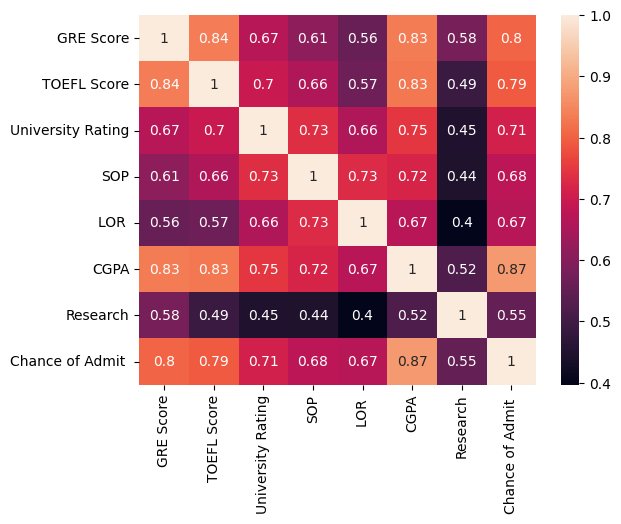

In [47]:
sns.heatmap(corr,annot=True)

[Text(0, 0, '181'), Text(0, 0, '219')]

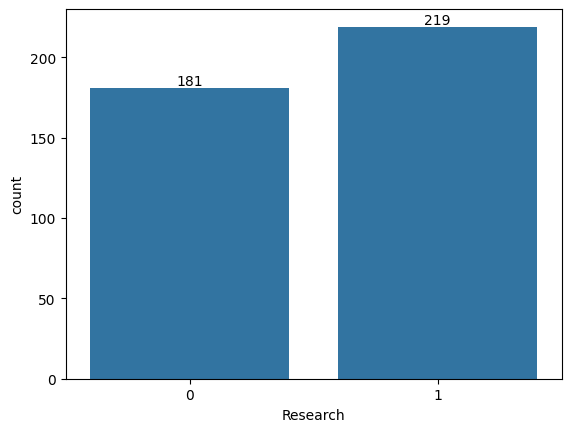

In [48]:
ax=sns.countplot(x='Research',data=data)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Research', ylabel='Chance of Admit '>

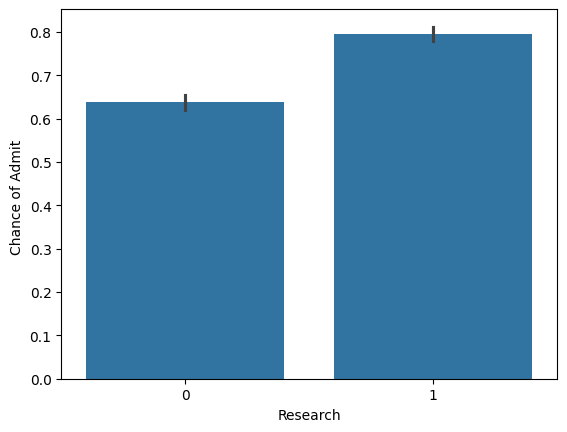

In [49]:
sns.barplot(x='Research', y='Chance of Admit ', data = data)

In [50]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

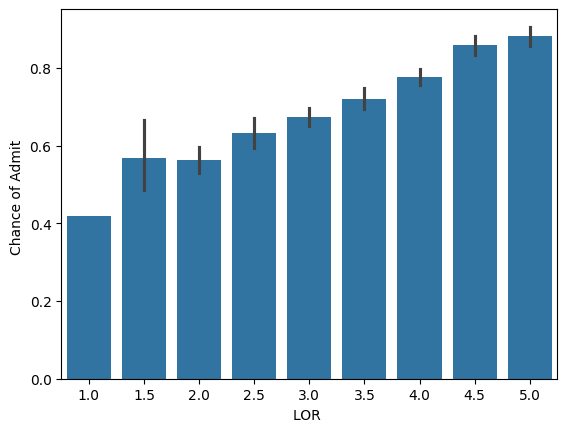

In [51]:
sns.barplot(x='LOR ', y='Chance of Admit ', data = data)

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

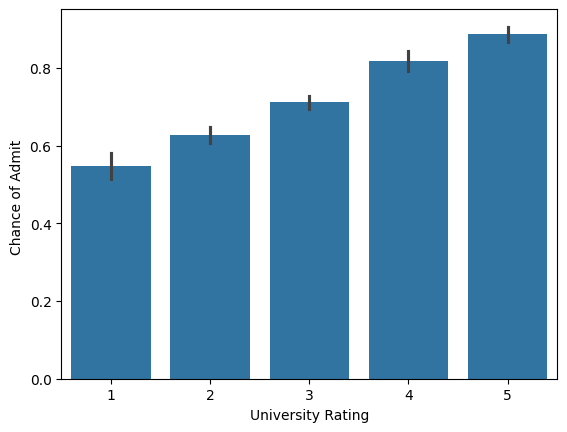

In [52]:
sns.barplot(x='University Rating', y='Chance of Admit ', data = data)

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

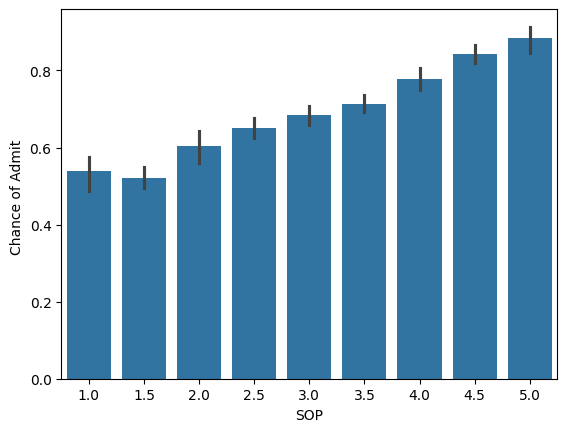

In [53]:
sns.barplot(x='SOP', y='Chance of Admit ', data = data)

<Axes: xlabel='TOEFL Score', ylabel='GRE Score'>

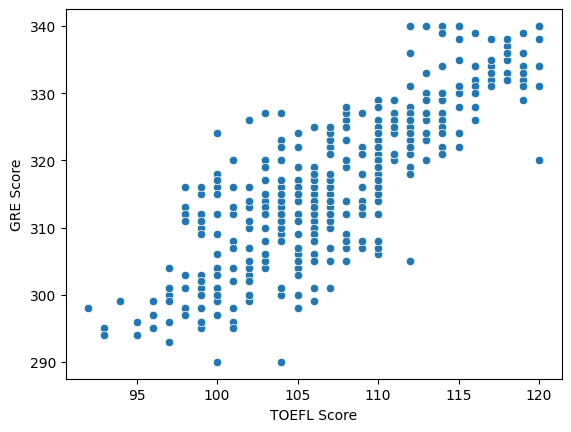

In [54]:
sns.scatterplot(x='TOEFL Score',y='GRE Score',data=data)

<Axes: xlabel='TOEFL Score', ylabel='GRE Score'>

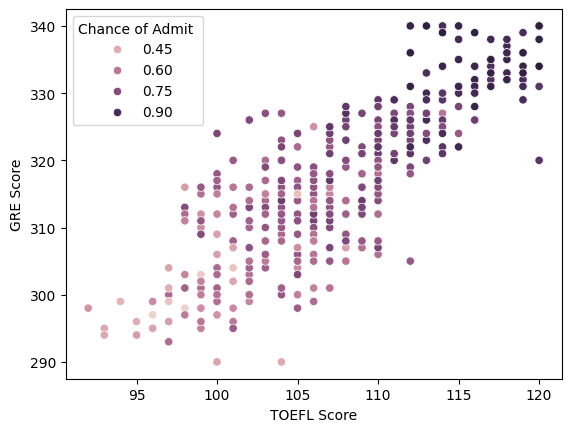

In [55]:
sns.scatterplot(x='TOEFL Score',y='GRE Score',hue='Chance of Admit ',data=data)

<Axes: xlabel='TOEFL Score', ylabel='Count'>

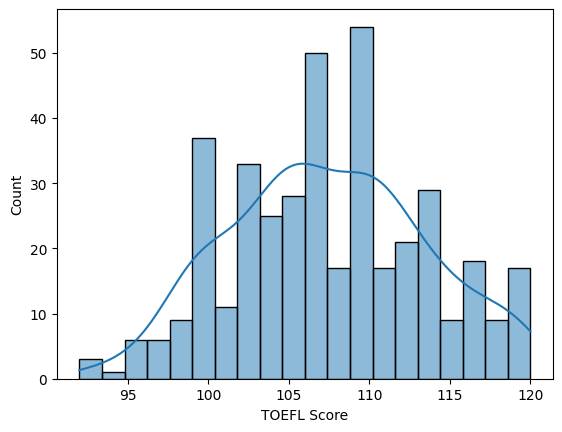

In [56]:
sns.histplot(data['TOEFL Score'],bins=20,kde=True)

<Axes: xlabel='GRE Score', ylabel='Count'>

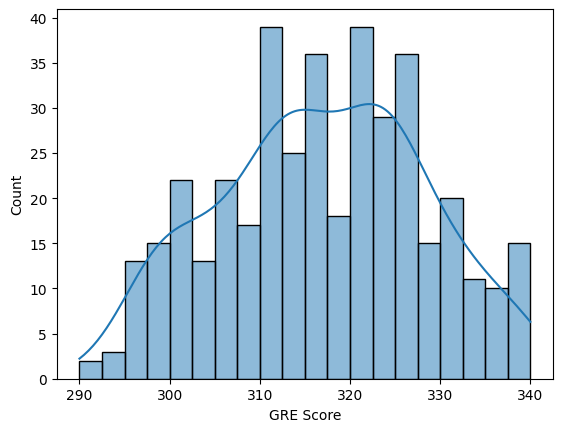

In [57]:
sns.histplot(data['GRE Score'],bins=20,kde=True)

In [60]:
y= data['Chance of Admit ']
X=data.drop(['Chance of Admit '],axis=1)

In [62]:
y.shape

(400,)

In [63]:
X.shape

(400, 7)

In [68]:
y=np.array(y)
y=y.reshape(-1,1)

In [69]:
y.shape

(400, 1)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.20)

In [74]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(320, 7) (80, 7) (320, 1) (80, 1)


In [81]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_predictions=LR.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('\n MSE is:',mean_squared_error(y_predictions,y_test))
print('The r squared value is:',r2_score(y_predictions,y_test))
print('\n Mean absolute error is:',mean_absolute_error(y_predictions,y_test))


 MSE is: 0.22758907347900395
The r squared value is: 0.727000083331922

 Mean absolute error is: 0.3367016177179793


In [84]:
X1=data[['CGPA']]
y1=data[['Chance of Admit ']]

In [87]:
Ln_model2=LinearRegression().fit(X1, y1)

In [88]:
coefficient=Ln_model2.coef_[0]
intercept=Ln_model2.intercept_

In [89]:
print('Coeffienct=',coefficient)
print('Intercept=',intercept)

Coeffienct= [0.20884723]
Intercept= [-1.07151166]
